In [1]:
from preprocessing.orig_data_processing import *
from src.config import config
from src.plotting import *
import src.classifiers.classical as classical
import src.classifiers.ensemble as ensemble

os.makedirs(config.RESULTS_DIR, exist_ok=True)
summary, confusion_matrices, roc_curves = [], {}, {}
train_auc, test_auc = {}, {}
best_params_all = {}

In [2]:
train_dat, test_dat = processed_data()
models_to_run = classical.CLASSICAL_MODELS + ['LSTM']

for model in models_to_run:
    df = classical.classify(model, train_dat, test_dat, confusion_matrices, roc_curves, train_auc, test_auc, best_params_all)
    summary.append(df)

Loaded: X.shape=(34149, 100, 2), y.shape=(34149,)
🔍 Best RandomForest params: {'n_estimators': 200}
🔍 Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🔍 Best GB params: {'learning_rate': 0.1, 'n_estimators': 200}
🔍 Best LSTM params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'units': 32}
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [6]:
for model in ensemble.ENSEMBLE_MODELS:
    df = ensemble.classify(models_to_run, model, train_dat, test_dat, confusion_matrices, roc_curves, train_auc, test_auc, best_params_all)
    summary.append(df)

In [9]:
#Save metrics and figures
pd.concat(summary).to_csv(os.path.join(config.RESULTS_DIR, "summary_metrics.csv"), index=False)
save_all_confusion_matrices(confusion_matrices, dir='results/')
save_all_roc_curves(roc_curves, dir='results/')
save_auc_comparison(train_auc, test_auc, dir='results/')
print("\n✅ Finished! All metrics and figures saved to:", config.RESULTS_DIR)


✅ Finished! All metrics and figures saved to: ./results


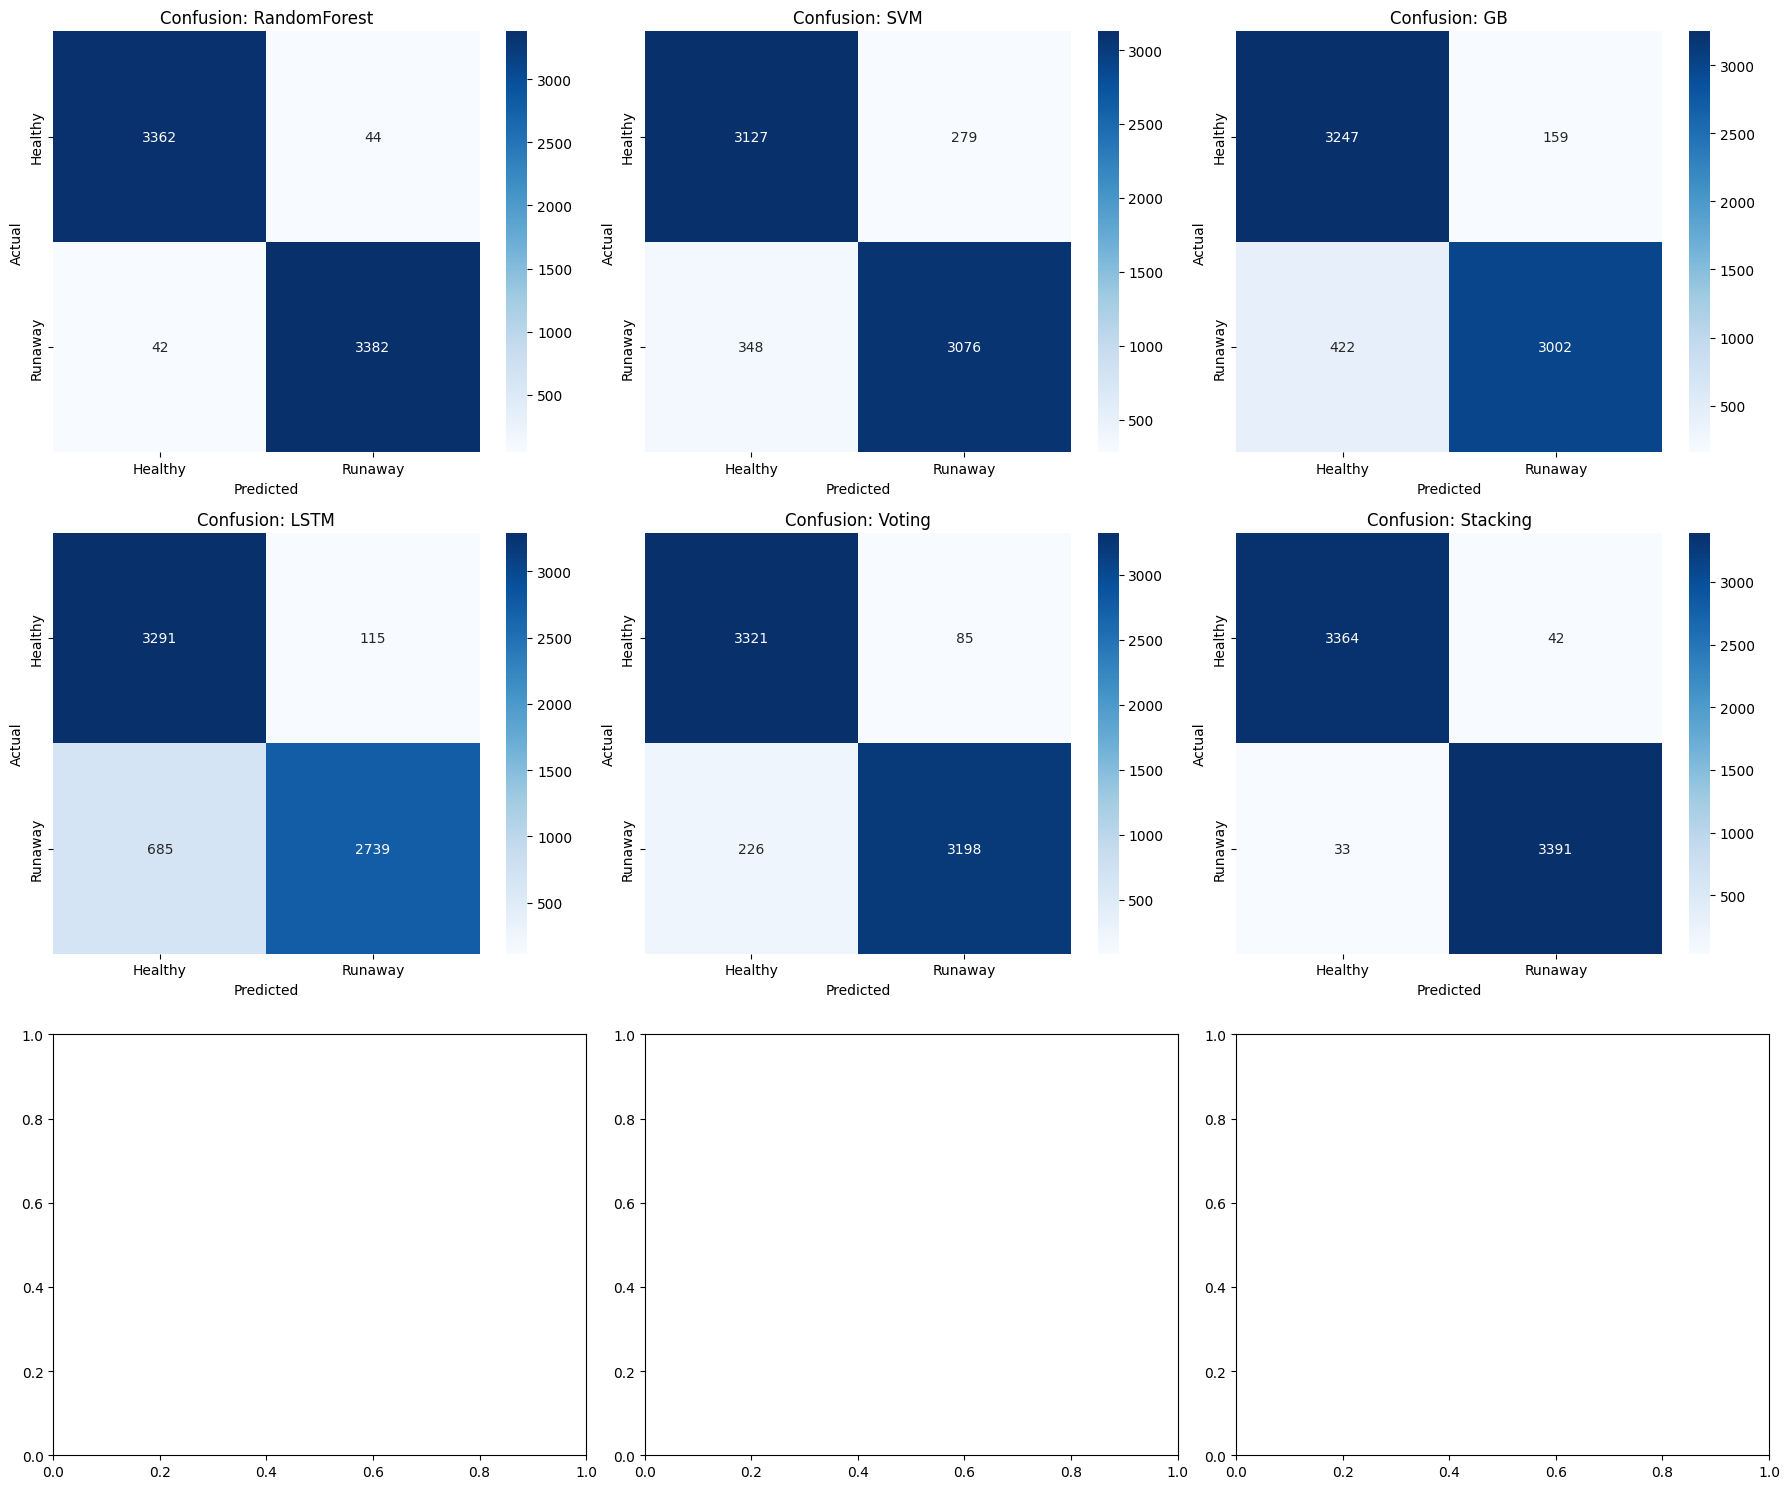

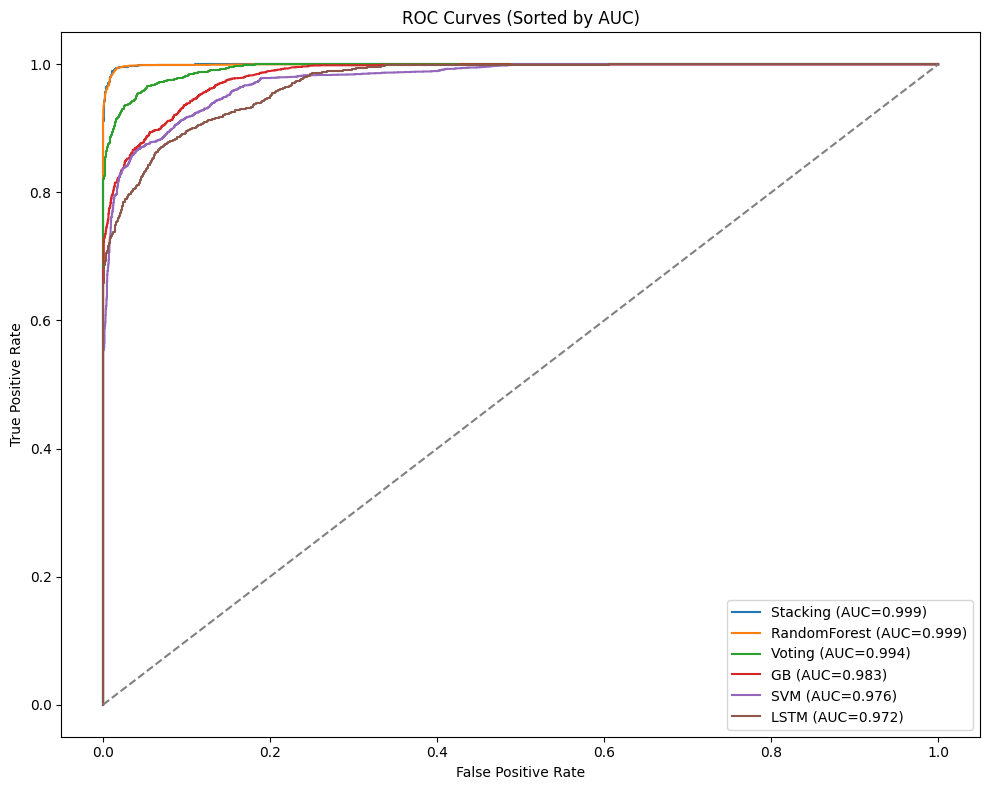

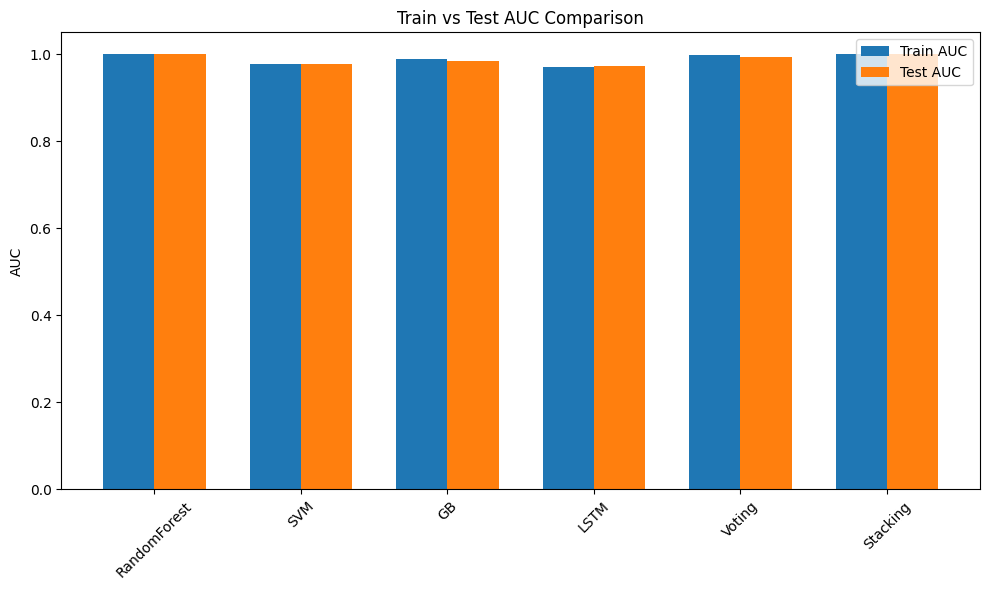

In [8]:
#Plotting Confusion Matrices
plot_confusion_matrices(confusion_matrices)

#ROC Curves
plot_roc_curves(roc_curves)

#Train vs Test AUC Comparison
auc_comparison(train_auc, test_auc)
